# Test to understand polynomial regression in Python

Astuce : pour efficace, il faudrait connaitre la fonction et déjà implémenter cela dans la matrice X. Par exemple, si la fonction est 
f(x,z) = x^2 + z + 0.2 z^2  , l'algorithme va trouver les coefficients pour autant qu'on choisisse 
X = [1 x^2 z z^2]

## Dataset generation

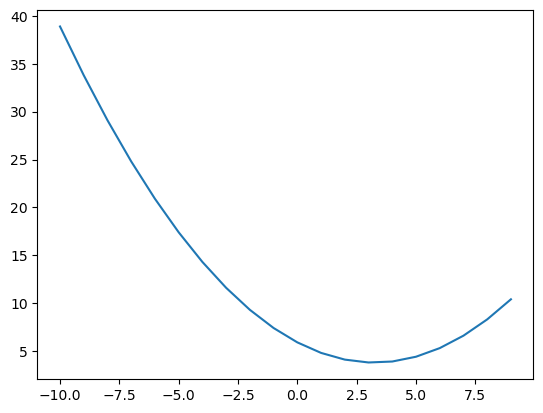

In [353]:
def fun(x,z):
    y = 0.9 + 0.7*x + 0.0*x**2 + 0*z + 0.2*z**2
    return y

import numpy as np

x_size = 20

x1 = np.array([i-10 for i in range(x_size)])
t = np.array([i-15 for i in range(x_size)])
y = np.array([fun(x1[i],t[i]) for i in range(x_size)])

import matplotlib.pyplot as plt
plt.plot(x1,y)
plt.show()

## Least square estimation

In [354]:
# Mapping

x4 = x1*x1*x1*x1
x3 = x1*x1*x1
x2 = x1*x1
x0 = [1 for i in range(x_size)]

# Mapping for second variable
t2 = t*t
t3 = t*t*t
t4 = t*t*t*t

In [371]:
# Matrices for different polynomial estimation

X_linear = [x0,x1,t]
X_quad = [x0,x1,t2]
X_cubic = [x0,x1,x2,x3,t,t2,t3]
X_power4 = [x0,x1,x2,x3,x4,t,t2,t3,t4]

In [372]:
# Create transpose functions

X_linear_t = np.transpose(X_linear)
X_quad_t = np.transpose(X_quad)
X_cubic_t = np.transpose(X_cubic)
X_power4_t = np.transpose(X_power4)

In [373]:
from numpy.linalg import inv  # allows for computing matrix inverse

Beta_lin = np.dot(inv(np.dot(X_linear,X_linear_t)),  np.dot(X_linear,y))
Beta_quad = np.dot(inv(np.dot(X_quad,X_quad_t)),  np.dot(X_quad,y))
Beta_cubic= np.dot(inv(np.dot(X_cubic,X_cubic_t)),  np.dot(X_cubic,y))
Beta_power4 = np.dot(inv(np.dot(X_power4,X_power4_t)),  np.dot(X_power4,y))

In [374]:
def R_score(y_hat,y):
    error = [0 for i in range(len(y_hat))]
    y_mean = np.mean(y)
    error_hat_sq = 0
    error_mean_sq = 0
    for i in range(len(y_hat)):
        error_hat_sq += (y_hat[i] - y[i])**2
        error_mean_sq += (y_hat[i] - y_mean)**2
    return (error_mean_sq - error_hat_sq)/error_mean_sq

### Prediction

In [375]:
y1_hat = [sum(Beta_lin*X_linear_t[i]) for i in range(x_size)]
y2_hat = [sum(Beta_quad*X_quad_t[i]) for i in range(x_size)]
y3_hat = [sum(Beta_cubic*X_cubic_t[i]) for i in range(x_size)]
y4_hat = [sum(Beta_power4*X_power4_t[i]) for i in range(x_size)]

In [376]:
Beta_power4

array([-1.17760000e+04,  1.34400000e+03,  1.28000000e+02, -1.50000000e+00,
       -6.88338275e-15, -2.68800000e+03, -1.28000000e+02,  1.31250000e+00,
        5.03069808e-17])

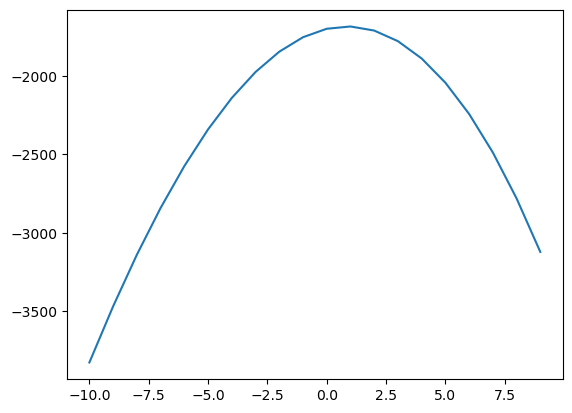

In [377]:
plt.plot(x1,y4_hat)
plt.show()

### R-score on prediction

In [378]:
R1 = R_score(y1_hat,y)
R2 = R_score(y2_hat,y)
R3 = R_score(y3_hat,y)
R4 = R_score(y4_hat,y)

In [379]:
[R1,R2,R3,R4]

[0.21279177377892033, 1.0, -0.004644169987646688, -0.0018470725367290377]

In [363]:
Beta_lin

array([-64.,   0.,  -8.])

In [343]:
Beta_power4

array([-1.22880000e+04,  1.28000000e+03,  1.40000000e+02, -1.56250000e+00,
       -6.88338275e-15, -2.81600000e+03, -1.28000000e+02,  1.37500000e+00,
        5.03069808e-17])